In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as so
import numpy
import math

In [2]:
desired_length1=2**.5
desired_length2=1
desired_length3=1
desired_length4 = 1.2

In [3]:
def Rz(theta):
    ct = math.cos(theta)
    st = math.sin(theta)
    Rz = numpy.array([[ct,-st,0 ],[st,ct,0],[0,0,1]])
    return Rz

Rz(math.pi*30/180)

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [4]:
def objective_function(x):

    alpha1,alpha2,alpha3,alpha4 = x
    
    # p1 = numpy.array([x1,y1])
    # p2 = numpy.array([x2,y2])
    
    Rab = Rz(alpha1)
    Rbc = Rz(alpha2)
    Rcd = Rz(alpha3)
    Rda = Rz(alpha4)
    p3 = desired_length2*Rab*numpy.array([[1,0,0]]).T+l1*numpy.array([[1,0,0]]).T
    p4 = desired_length3*Rab*Rbc*numpy.array([[1,0,0]]).T+p3
    p1p = desired_length4*Rab*Rbc*Rcd*numpy.array([[1,0,0]]).T+p4
    p2p = desired_length1*Rab*Rbc*Rcd*Rda*numpy.array([[1,0,0]]).T+p1p

    v1 = p1p-p1
    v2 = p2p-p2
    
    error = []
    error.append(alpha1- math.pi*30/180)
    error.append(v1.dot() )
    error.append(v1.dot() )
    error.append(v2.dot() )
    
    
    
    error = numpy.array(error)
    sum_of_squares = ((error**2).sum())**.5
    return sum_of_squares    

In [5]:
objective_function([0,0,1,1,2,1,1,0])

0.5292558877384543

In [6]:
x_0=[0,0,1,1,2,1,1,0]
result=so.minimize(objective_function,x_0,method="powell")
result

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 3.0840870448545856e-12
       x: [-1.202e-12  6.677e-13  1.225e+00  7.071e-01  2.147e+00
            3.208e-01  1.200e+00 -1.528e-12]
     nit: 29
   direc: [[ 2.063e-06  2.112e-06 ... -2.722e-06 -1.339e-06]
           [ 8.294e-05 -2.678e-04 ... -1.058e-04 -4.831e-05]
           ...
           [ 0.000e+00  0.000e+00 ...  1.000e+00  0.000e+00]
           [-4.089e-13  2.209e-13 ... -5.094e-13 -2.155e-14]]
    nfev: 5007

In [7]:
result.x

array([-1.20227222e-12,  6.67651412e-13,  1.22474487e+00,  7.07106781e-01,
        2.14713277e+00,  3.20841890e-01,  1.20000000e+00, -1.52750865e-12])

In [8]:
def plot_x(x):
    x1,y1,x2,y2,x3,y3,x4,y4 = x
    p1 = numpy.array([[x1,y1]]).T
    p2 = numpy.array([[x2,y2]]).T
    p3 = numpy.array([[x3,y3]]).T
    p4 = numpy.array([[x4,y4]]).T
    
    p = numpy.hstack([p1,p2,p3,p4])
    plt.plot(p[0,(0,1,2,3,0)],p[1,(0,1,2,3,0)])
    for ii,item in enumerate(p.T):
        plt.text(item[0],item[1],'p'+str(ii+1))
    plt.axis('equal')
    plt.show()

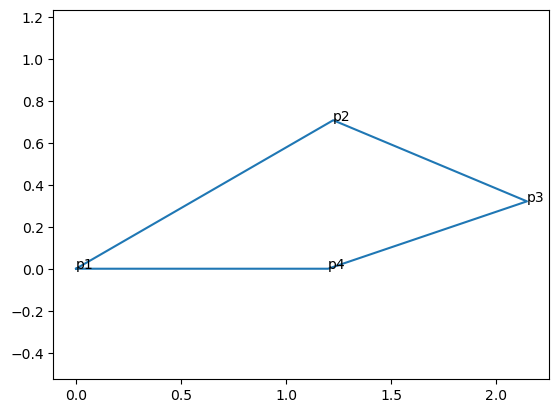

In [9]:
plot_x(result.x)